<a href="https://colab.research.google.com/github/hoangviet2k4/Hoc-may1/blob/main/wine_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Nhập vào các thư viện cần thiết
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

In [ ]:
# Importing data
from google.colab import files
uploaded = files.upload()

Saving wine-clustering.csv to wine-clustering.csv


In [ ]:
data = pd.read_csv('wine-clustering.csv')

# 1.Exploratory Data Analysis

## 1.1 Data Structure

In [ ]:
# Viewing data.head()
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


- Bằng cách sử dụng `data.head()`, chúng ta có thể nhanh chóng xem cấu trúc của 5 mục dữ liệu đầu tiên. Ở đây, chúng ta có thể thấy ví dụ về cách dữ liệu trông như thế nào và giá trị chúng ta có thể mong đợi thấy dưới mỗi cột.

In [ ]:
# Viewing data.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


- Bằng cách sử dụng `data.info()`, chúng ta có thể xác định tổng số bản ghi hoặc hàng trong bộ dữ liệu này. Ở đây, chúng ta có thể thấy có 178 bản ghi với 13 đặc trưng hoặc cột. Hơn nữa, tất cả các cột đều có kiểu dữ liệu số, tức là float64 hoặc int64.

In [ ]:
# Kiểm tra xem có giá trị null nào không
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

- Bằng cách sử dụng `data.isna()`, chúng ta có thể tổng hợp bất kỳ giá trị null nào có thể xuất hiện trong mỗi trong 13 cột. May mắn là không có giá trị null nào được tìm thấy. Mặc dù bộ dữ liệu này đã khá sạch sẽ, nhưng chúng ta sẽ tiến hành tiền xử lý dữ liệu sau đó để chuẩn bị cho việc gom cụm.

## 1.2 Histograms

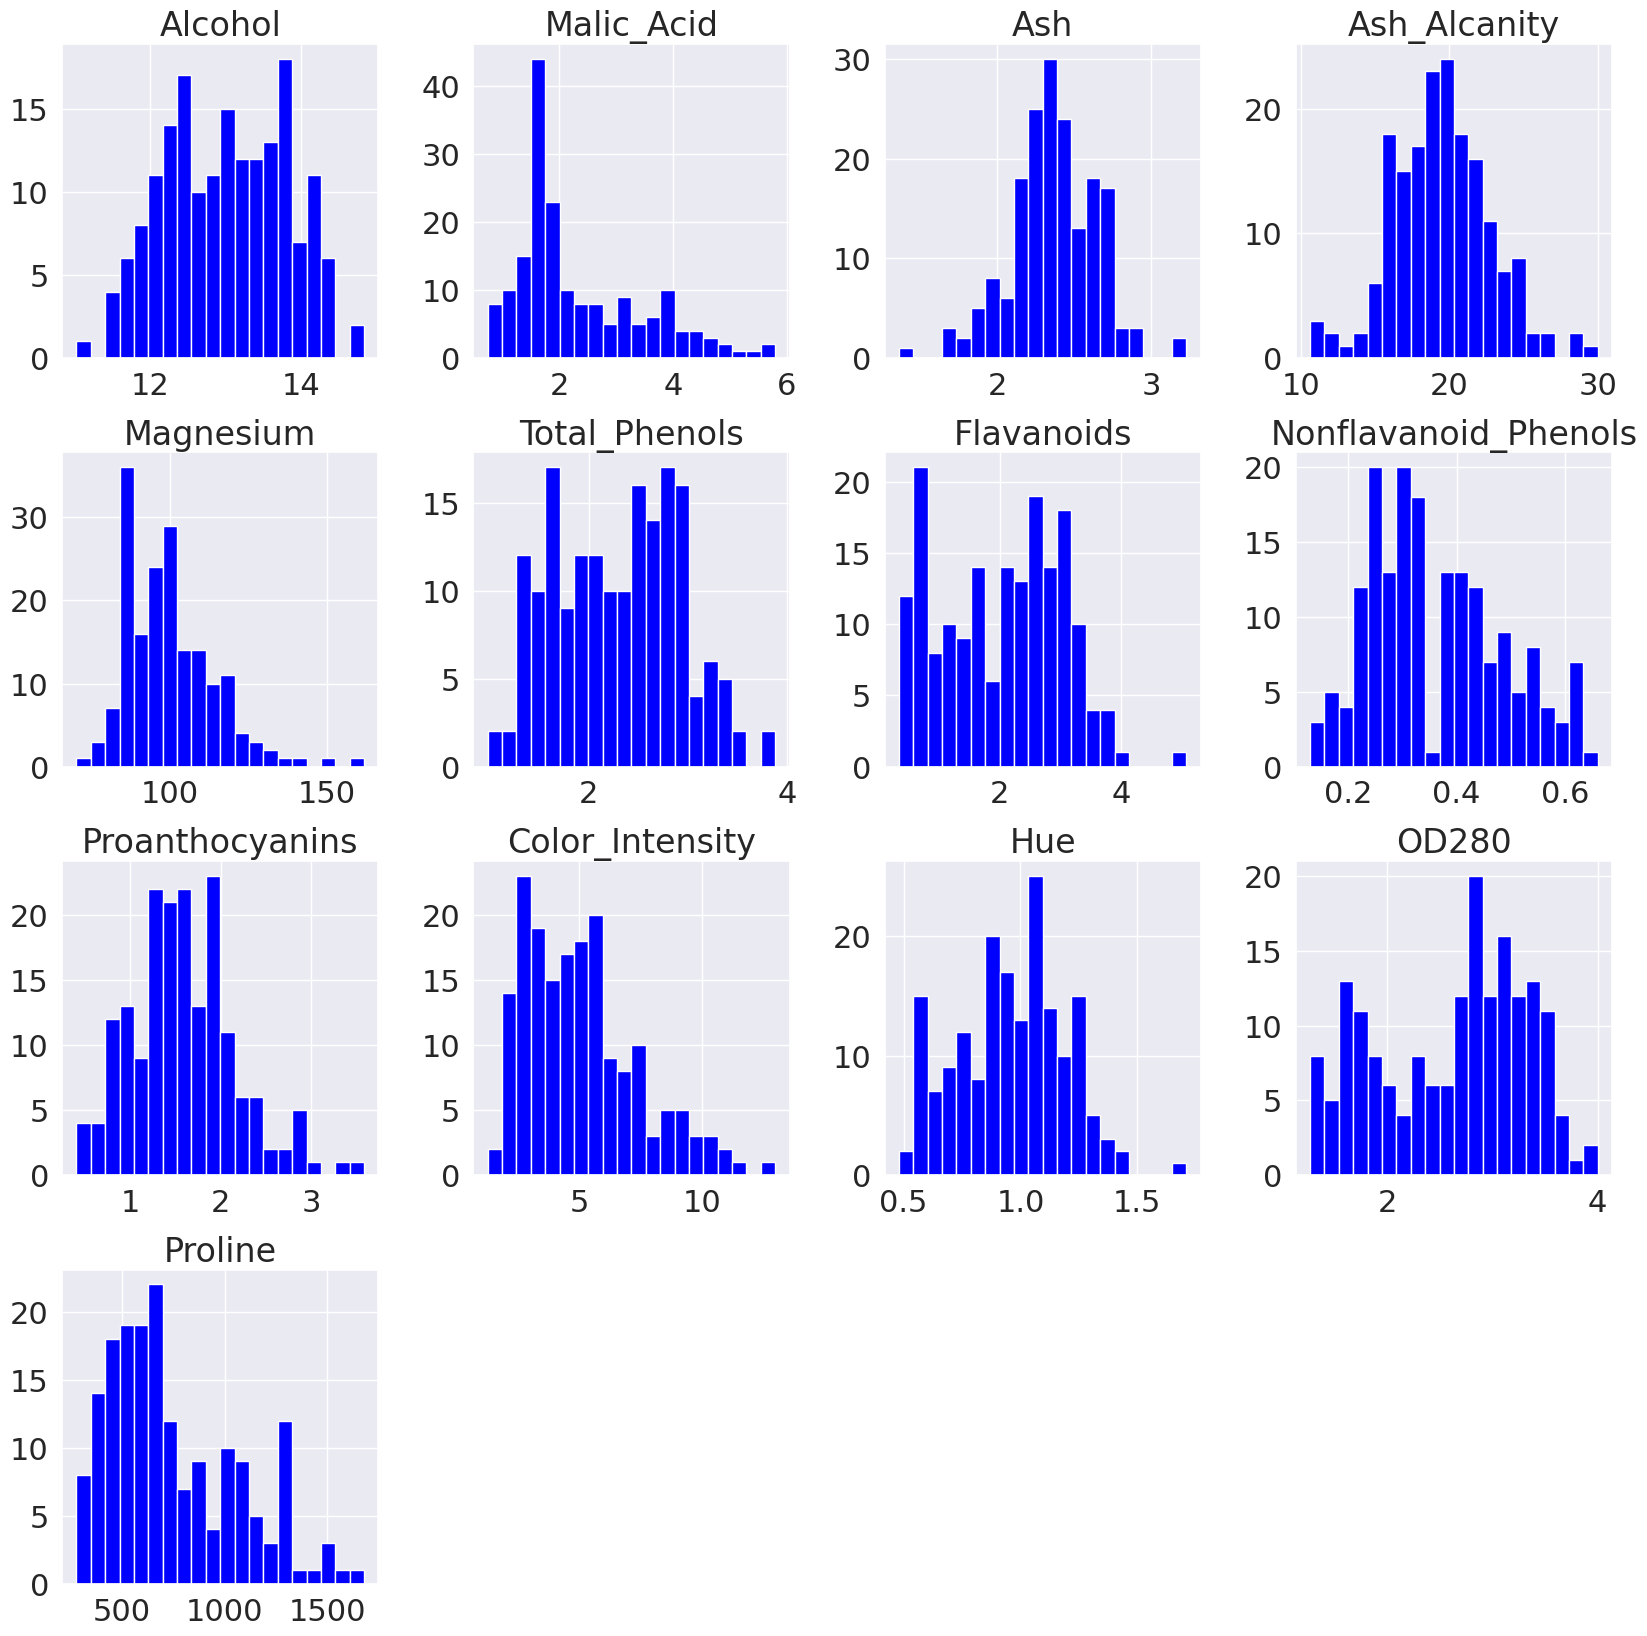

In [ ]:
# Tạo histogram của các đặc trưng để xem phân phối dữ liệu.
sns.set(style='darkgrid',font_scale=2, rc={'figure.figsize':(20,20)})
ax=data.hist(bins=20,color='blue' )

- Các biểu đồ histogram trên mang lại cho chúng ta cái nhìn sâu sắc về phân phối của dữ liệu. Ở đây, chúng ta có thể thấy phân phối của giá trị cho mỗi đặc trưng. Một cách tổng quan, Proline, Color_Intensity, Magnesium và Malic_Acid dường như có phân phối dữ liệu cao hơn về phía giá trị thấp hơn (phía bên trái của histogram). Tất cả các đặc trưng khác dường như có phân phối tương đối cân bằng hơn. Chúng ta có thể có thêm cái nhìn sâu sắc hơn về phân phối của bộ dữ liệu bằng cách sử dụng hàm `.skew()` (dưới đây).

In [ ]:
# Kiểm tra sự chệch (skewness) của dữ liệu
data.skew()

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

- Bằng cách sử dụng `data.skew()`, chúng ta có thể xác định thêm về phân phối của dữ liệu cho mỗi đặc trưng. Một đặc trưng có skewness bằng 0 sẽ đại diện cho dữ liệu có phân phối hoàn toàn cân bằng. Đặc trưng có skewness lớn hơn 0 có phân phối dữ liệu cao hơn về phía bên trái, và đặc trưng có skewness nhỏ hơn 0 có phân phối cao hơn về phía bên phải. Ở đây, chúng ta có thể xác nhận rằng Proline, Color_Intensity, Magnesium và Malic_Acid có skewness đáng kể về phía bên trái. Ngược lại, OD280 có skewness cao nhất về phía bên phải của dữ liệu. Độ đồng đều nhất trong phân phối dữ liệu dường như thuộc về đặc trưng Hue, với skewness chỉ là 0.021.

## 1.3 Box Plots

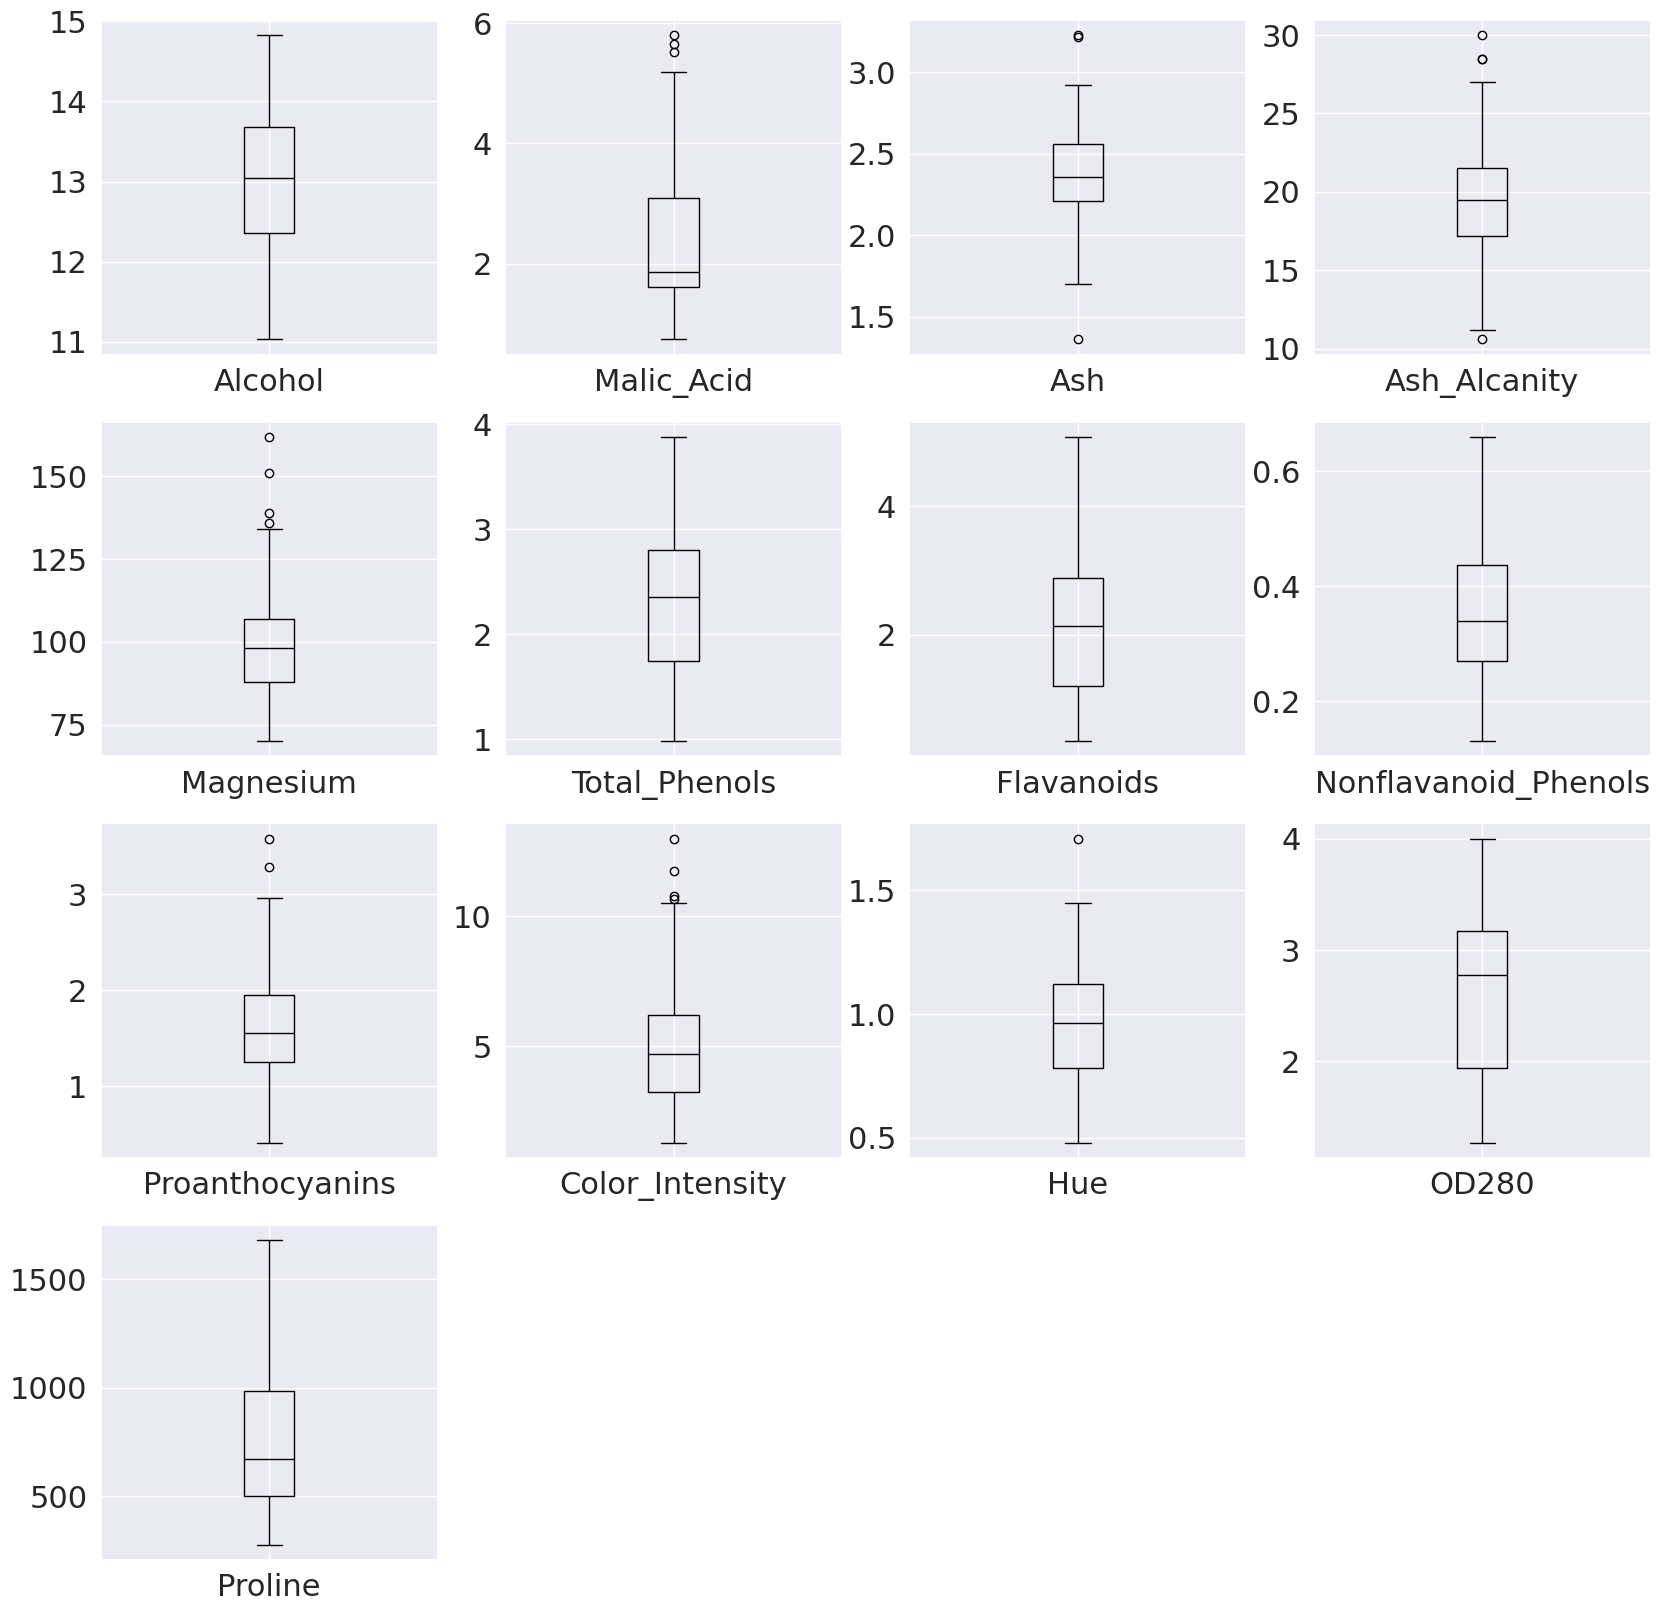

In [ ]:
# Vẽ biểu đồ phân phối dữ liệu bằng boxplots.
data.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

- Các biểu đồ hộp trên cung cấp một cái nhìn khác về phân phối của dữ liệu. Ví dụ, độ chệch cao về phía bên trái của Malic_Acid có thể được giải thích bởi đường gần dưới của hộp, tức là dữ liệu chệch về phía giá trị thấp hơn. Những biểu đồ hộp này cũng làm nổi bật các giá trị ngoại lệ. Ví dụ, đặc trưng Hue có một giá trị ngoại lệ tồn tại ngoài phân phối trung bình của dữ liệu. Mặc dù có thể loại bỏ các giá trị ngoại lệ để có thể tăng độ chính xác của các mô hình đã triển khai, tôi đã quyết định giữ nguyên dữ liệu. Điều này giúp chúng ta duy trì bức tranh thực tế nhất về dữ liệu.

## 1.4 Heatmap

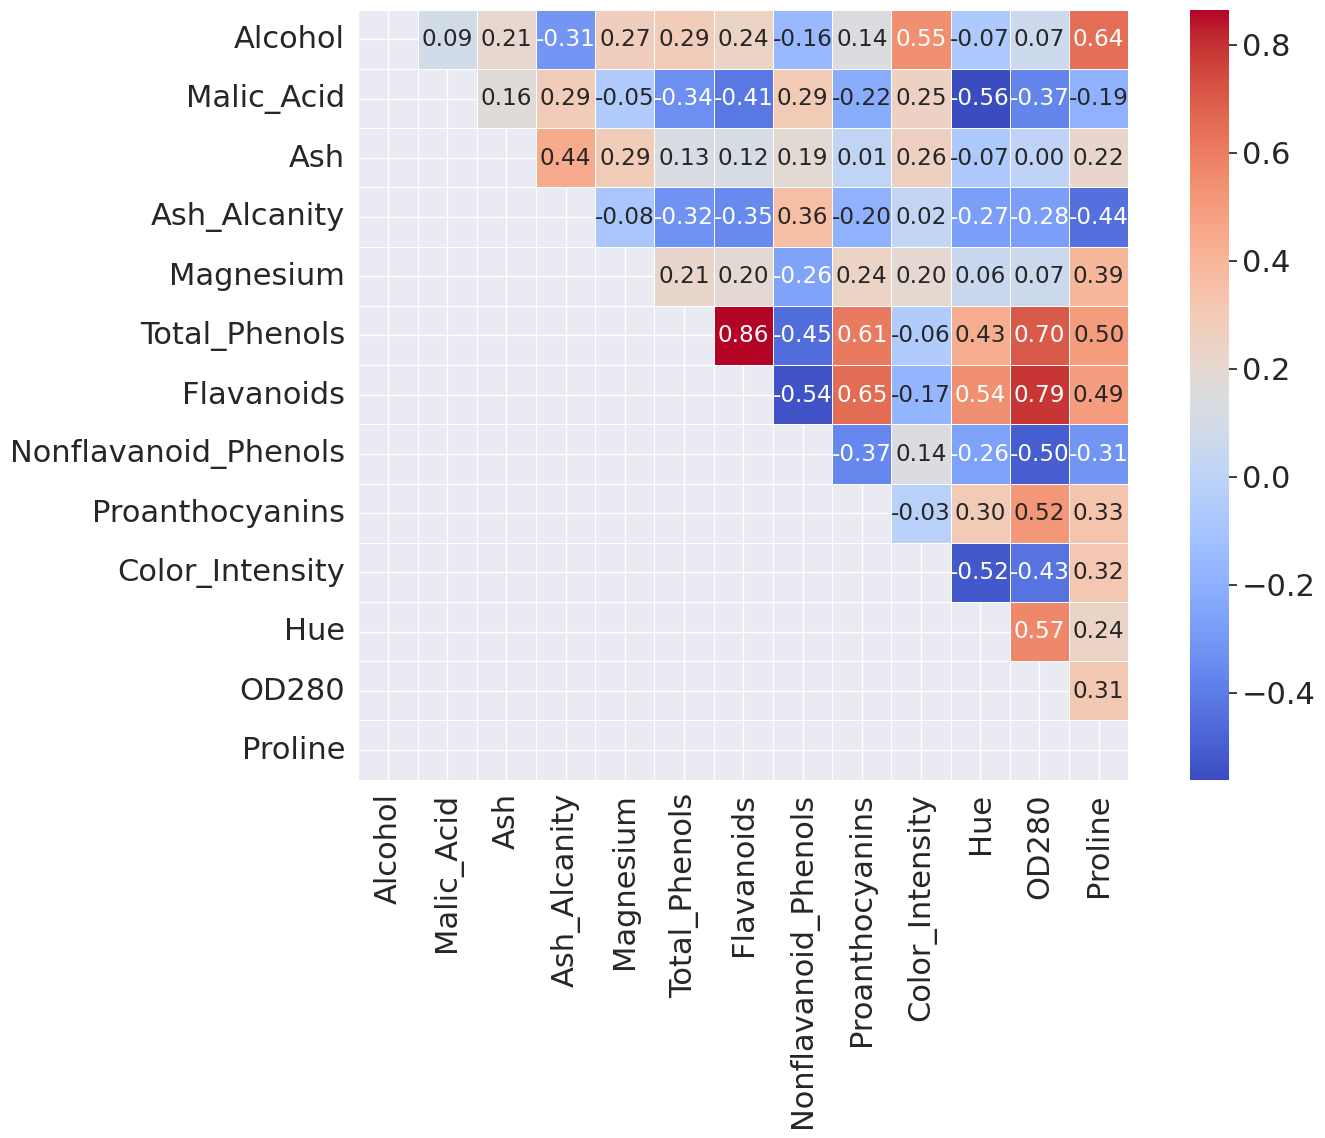

In [ ]:
# Tạo một heatmap của tương quan giữa các đặc trưng.
plt.figure(figsize=(16, 10))
mask = np.tril(data.corr())
sns.heatmap(data.corr(), cmap="coolwarm", annot=True, fmt='.2f', annot_kws={'size': 'x-small'}, linewidths=0.5, square=True, mask=mask);

- Heatmap ở trên cho chúng ta một ý tưởng về những đặc trưng có thể có tương quan với nhau. Tương quan mạnh nhất ở đây là giữa Total_Phenols và Flavanoids với giá trị 0.86. Với một tìm kiếm nhanh trên Wikipedia, bạn sẽ có thể cung cấp lý do cho mối quan hệ mạnh mẽ này. Trong thực tế, flavonoids chỉ là một loại con của phenols tự nhiên có thể được tìm thấy trong rượu vang. Một mối quan hệ mạnh khác tồn tại giữa Flavanoids và OD280 với giá trị 0.79.

## 1.5 EDA Summary

- Thông qua EDA ở trên, chúng ta đã đầu tiên có thể xác định cấu trúc tổng quan của bộ dữ liệu. Có tổng cộng 178 bản ghi (hàng) và 13 đặc trưng (cột) trong bộ dữ liệu. Kiểu dữ liệu của mỗi cột là số và là float64 hoặc int64. Sau khi kiểm tra giá trị null, chúng ta thấy không có giá trị nào. Tiếp theo, các biểu đồ histogram và boxplots làm nổi bật phân phối của dữ liệu. Có sự chệch lớn về phía bên trái đối với Proline, Color_Intensity, Magnesium, và Malic_Acid. Hơn nữa, một số đặc trưng có giá trị ngoại lệ. Tuy nhiên, những giá trị này sẽ không được loại bỏ khỏi bộ dữ liệu. Cuối cùng, một heatmap cho thấy có tương quan mạnh mẽ giữa Total_Phenols và Flavanoids (0.86) và giữa Flavanoids và OD280 (0.79). Cả hai mối tương quan này có thể được giải thích thông qua nghiên cứu ngắn về hàm lượng phenol trong rượu vang.

# 2.Data Preprocessing

## 2.1 Scaling Data

In [ ]:
# Applying StandardScaler()
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

- Bằng cách áp dụng StandardScaler(), chúng ta có thể tiền xử lý dữ liệu để chuẩn bị cho PCA, K-Means và t-SNE.

## 2.2 Principal Component Analysis

In [ ]:
# Applying PCA, n_components = 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)
pca_data = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
print('Shape after PCA: ', pca_data.shape)
print('Original shape: ', data_scaled.shape)
print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Shape after PCA:  (178, 2)
Original shape:  (178, 13)
Cumulative variance explained by 2 principal components: 55.41%


- Ở đây, chúng ta sử dụng Phân tích thành phần chính (PCA) để giảm chiều dữ liệu. Mặc dù chúng ta có thể mất mát một số phương sai, việc sử dụng PCA sẽ hỗ trợ tạo ra các hình ảnh trực quan tốt hơn. Ở phía trên, bạn có thể thấy rằng bằng cách áp dụng PCA, cấu trúc của bộ dữ liệu giờ đây là 178 hàng và 2 cột (các thành phần chính). Hơn nữa, chúng ta có thể thấy rằng việc sử dụng chỉ 2 thành phần chính đã thu được 55,41% của tổng phương sai.

Text(0.5, 1.0, 'PCA Plot')

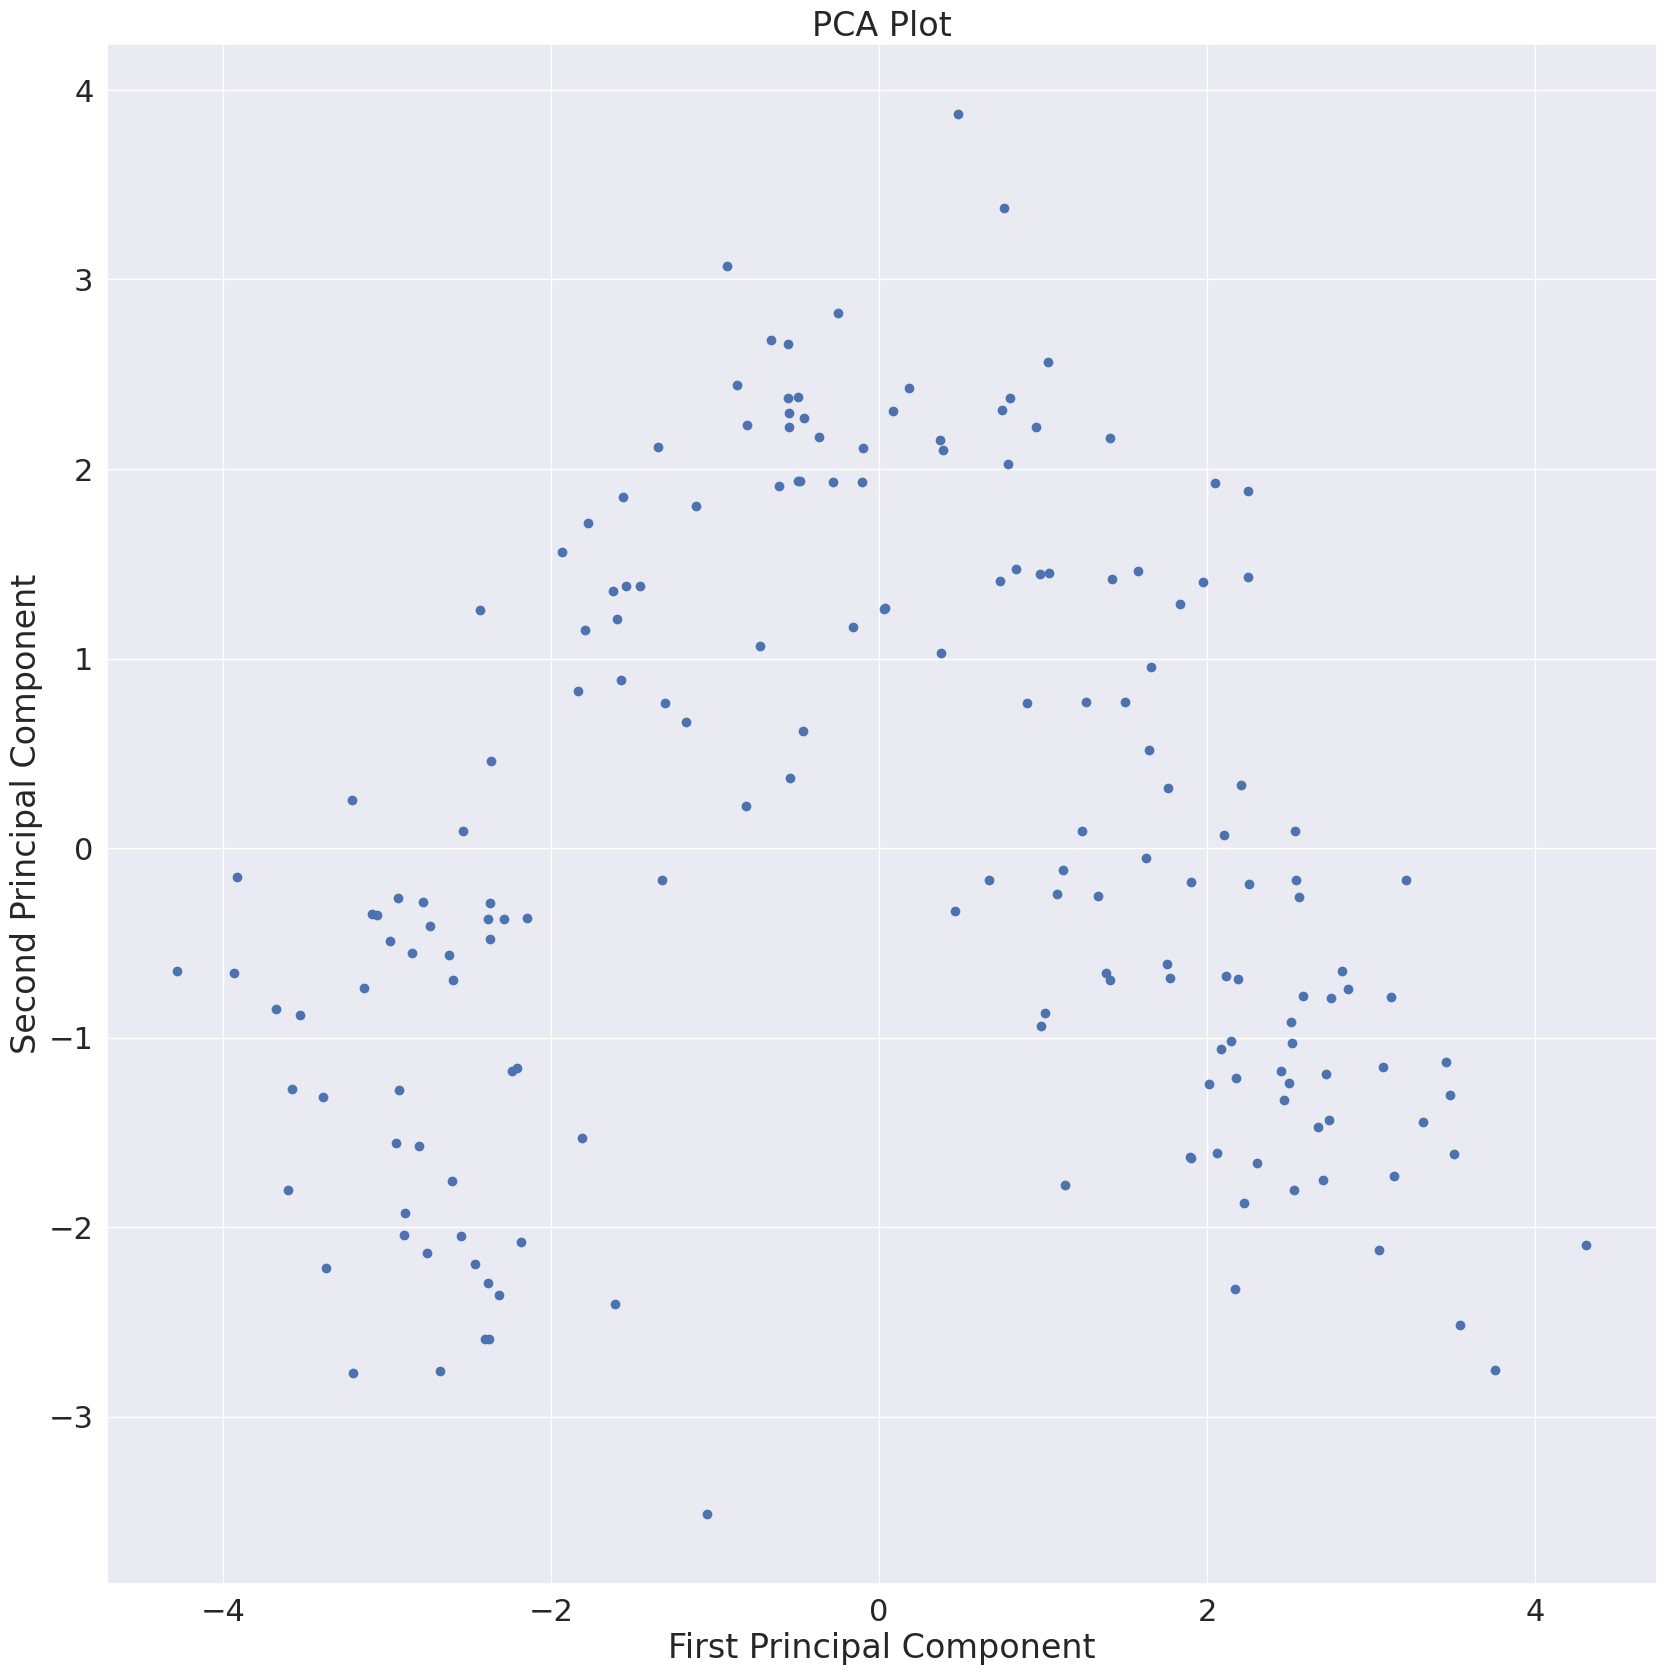

In [ ]:
# Plotting PCA, n_components = 2
plt.scatter(pca_data.iloc[:,0],pca_data.iloc[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Plot')

- Biểu đồ ở phía trên cho chúng ta thấy dữ liệu được gom cụm bởi thành phần chính thứ nhất và thứ hai. Tính đến thời điểm này, biểu đồ này chưa cung cấp nhiều thông tin hữu ích, vì không có màu sắc độc đáo được sử dụng để chỉ định các nhóm khác nhau. Tiếp theo, chúng ta sẽ sử dụng k-Means để gom cụm các điểm dữ liệu này thành các nhóm.

# 3. Clustering

## 3.1 Elbow Method

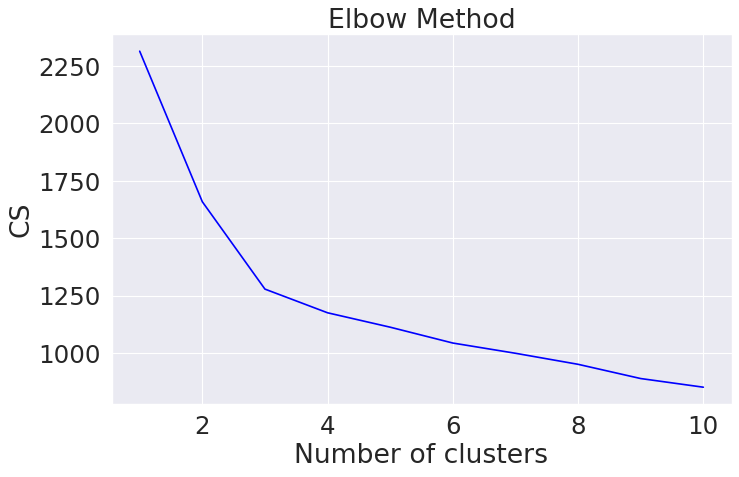

In [ ]:
# Applying elbow method to determine optimal n_clusters
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_scaled)
    cs.append(kmeans.inertia_)

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(range(1, 11), cs, color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

- Bằng cách sử dụng Phương pháp Elbow, chúng ta có thể xác định số lượng cụm tối ưu cho thuật toán k-Means. Biểu đồ ở phía trên cho thấy rằng n_clusters = 3 là lựa chọn lý tưởng nhất.

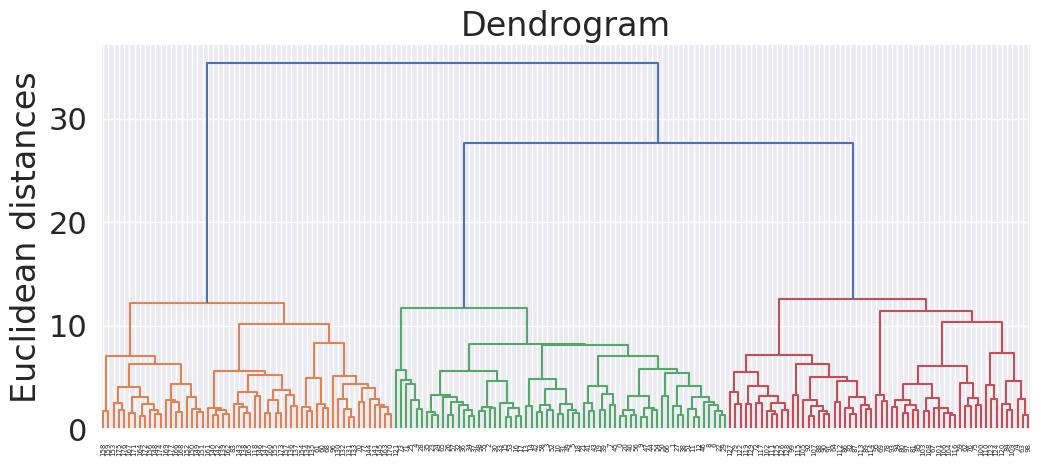

In [ ]:
# Plotting a dendrogram
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

## 3.2 Dendrogram

- Mặc dù chúng ta đã kết luận rằng n_clusters = 3 là tối ưu cho k-Means, nhưng chúng ta cũng có thể sử dụng một dendrogram để xác nhận và trực quan hóa số lượng cụm này. Ở phía trên, bạn có thể thấy ba nhóm con có màu sắc độc đáo (màu cam, màu xanh lá cây và màu đỏ). Những nhóm này được tạo ra thông qua ba sự chia chính dựa trên khoảng cách phân cấp của chúng. Mặc dù dendrograms thường được sử dụng cho việc gom cụm phân cấp liên kết, nhưng trực quan hóa này vẫn hữu ích ở đây, vì nó tiếp tục chứng minh số lượng cụm lý tưởng.

## 3.3 k-Means

In [ ]:
# Applying KMeans
kmeans = KMeans(n_clusters = 3, n_init = 15, max_iter = 500, random_state = 42)
clusters = kmeans.fit_predict(data_scaled)

In [ ]:
# Creating cluster centers
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Principal Component 2')

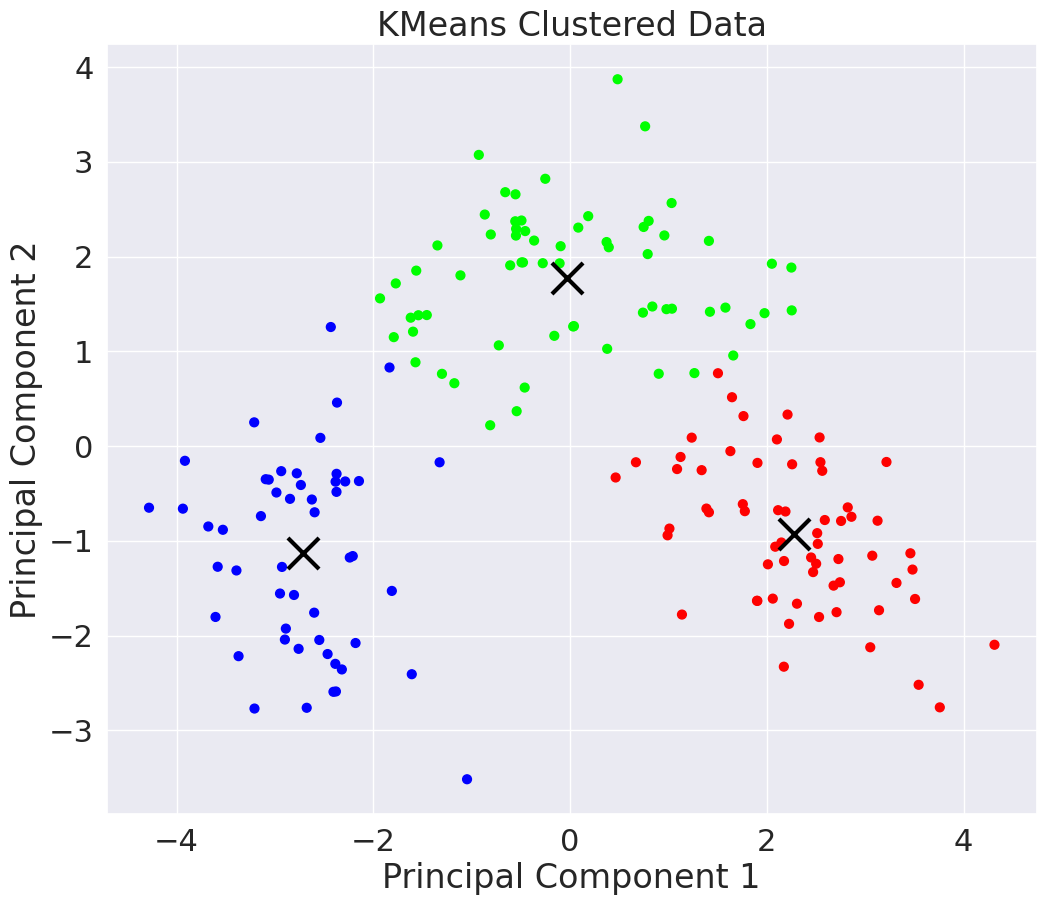

In [ ]:
# Plotting PCA in color
plt.figure(figsize=(12,10))
plt.scatter(pca_data.iloc[:,0], pca_data.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")
plt.title('KMeans Clustered Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

- Bằng cách sử dụng k-Means để gom cụm dữ liệu, chúng ta có thể cải thiện thêm biểu đồ PCA của mình. Ở phía trên, bạn có thể thấy dữ liệu được nhóm thành ba cụm, được màu xanh, xanh lá cây và đỏ. Hơn nữa, mỗi nhóm điểm dữ liệu được gom cụm xung quanh trung tâm gần nhất của nó (được đánh dấu bằng dấu X).

## 3.4 DBScan

In [ ]:
#  Perform a clstering

dbscan = DBSCAN(3)
dbscan

DBSCAN(eps=3)

In [ ]:
model = dbscan.fit_predict(data)
model

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
data['DBSCAN_Cluster'] = model
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,DBSCAN_Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,-1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,-1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,-1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,-1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,-1


In [ ]:
data1 = data[data['DBSCAN_Cluster']==0]
data2 = data[data['DBSCAN_Cluster']==1]
data3 = data[data['DBSCAN_Cluster']==-1]

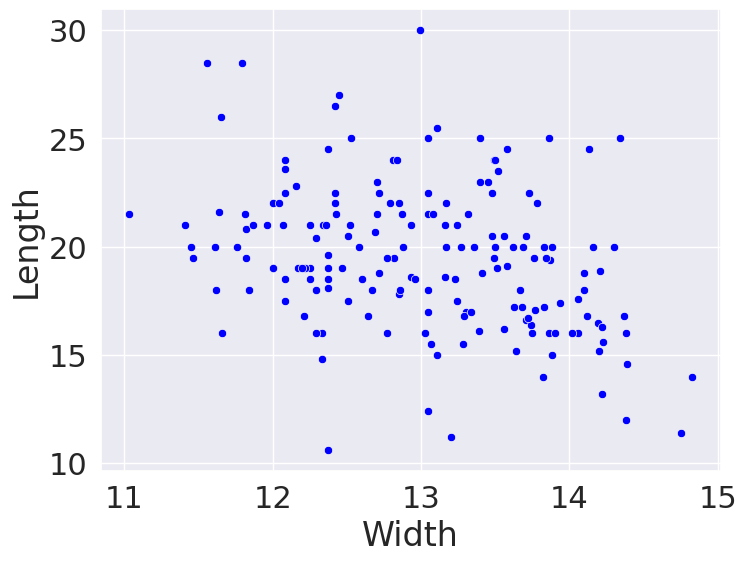

In [ ]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=data1, color='green')
sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=data2, color='red')
sns.scatterplot(x='Alcohol', y='Ash_Alcanity', data=data3, color='blue')

plt.xlabel('Width')
plt.ylabel('Length')

plt.show()